In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/DennKay/SIM_Assignment/main/diabetes.csv'
df = pd.read_csv(url)


# EDA

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_encoded
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [ ]:
#check for missing value
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


In [ ]:
from scipy import stats
z = np.abs(stats.zscore(df))
threshold = 3
outliers = np.where(z > threshold)
print("Indices of outliers:", outliers)

Indices of outliers: (array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753]), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4]))


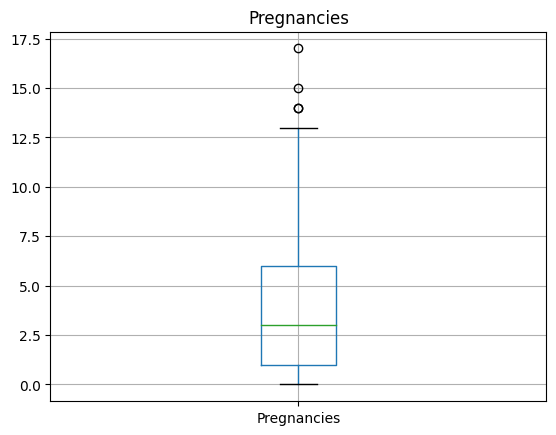

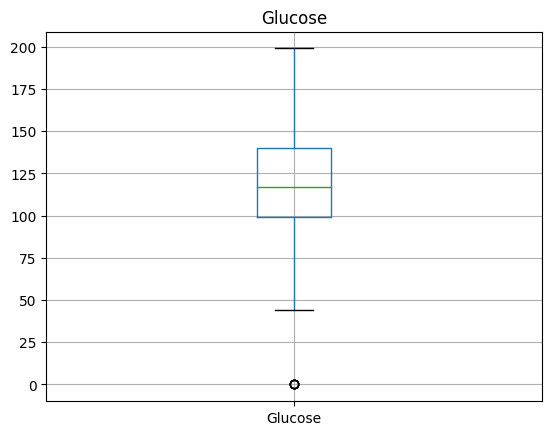

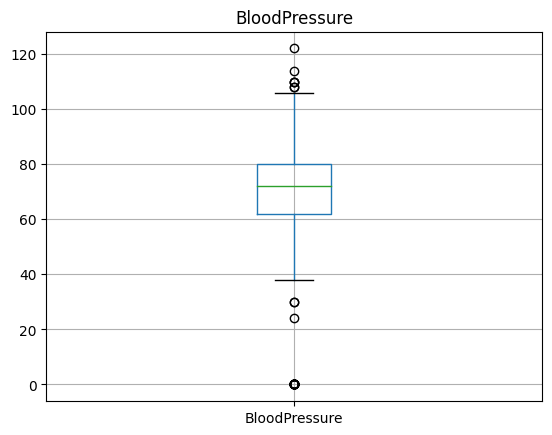

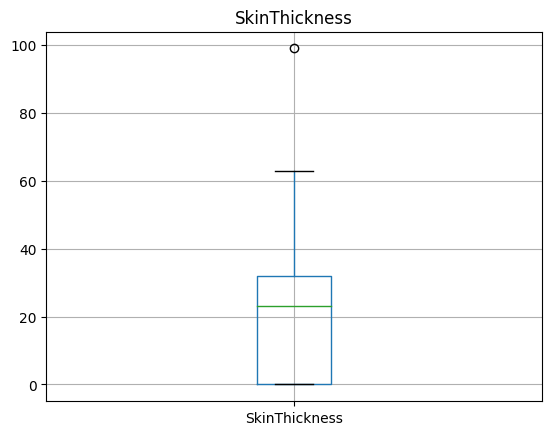

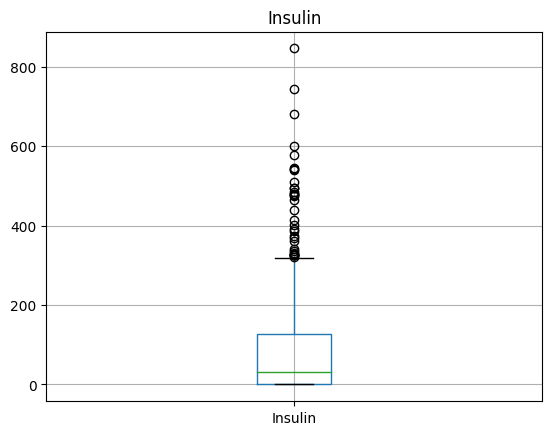

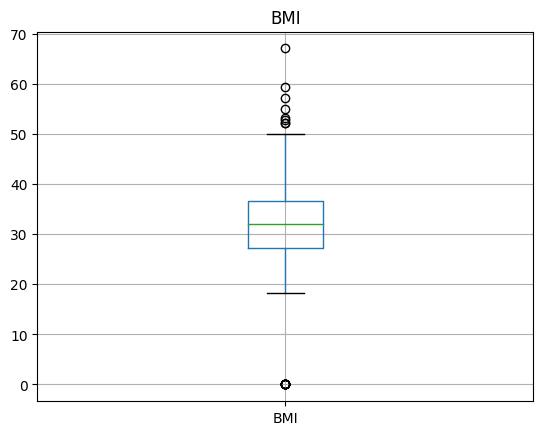

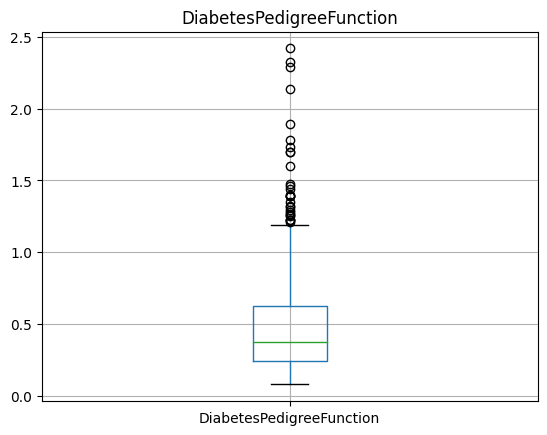

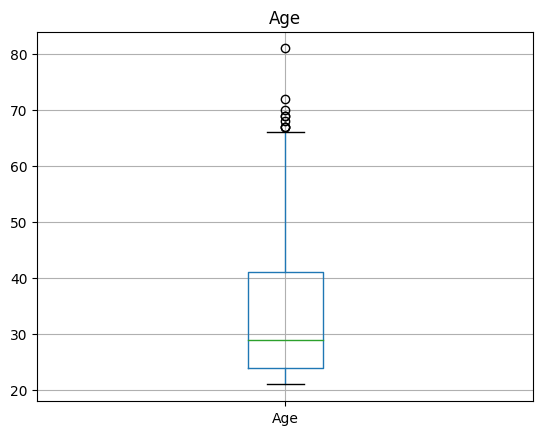

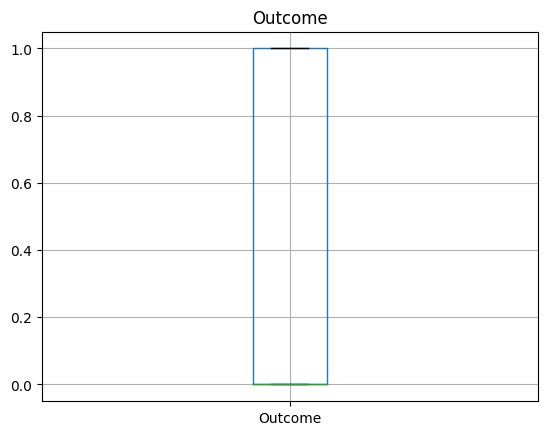

In [ ]:
# Box plot for each column
for column in df.columns:
    plt.figure()
    df.boxplot([column])
    plt.title(column)
plt.show()

In [ ]:
df_log_transformed = np.log(df + 1)  # Add 1 to avoid log(0)

In [ ]:
df_log_transformed = np.log(df + 1)  # Add 1 to avoid log(0)
#z = np.abs(stats.zscore(df))
threshold = 3
outliers = np.where(z > threshold)
print("Indices of outliers:", outliers)

Indices of outliers: (array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753]), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4]))


In [ ]:
# Splitting the data into training and testing sets
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

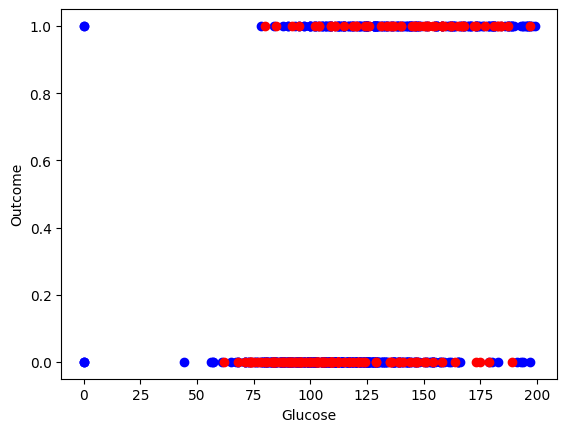

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train['Glucose'], y_train, color='blue')
plt.scatter(X_test['Glucose'], y_test, color='red')
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.show()

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))


Before OverSampling, counts of label '1': 213
Before OverSampling, counts of label '0': 401


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X_train, y_train)


In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, counts of label '1': 401
After OverSampling, counts of label '0': 401


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

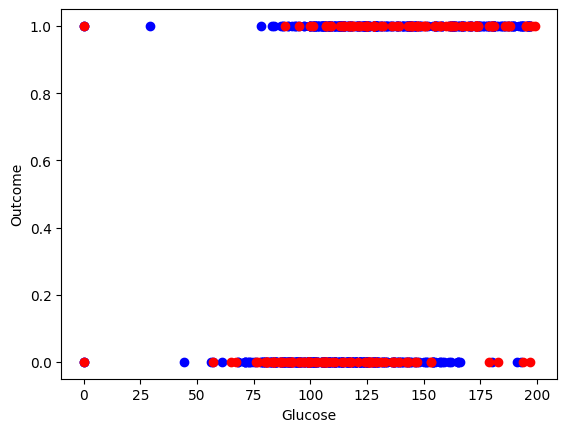

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train['Glucose'], y_train, color='blue')
plt.scatter(X_test['Glucose'], y_test, color='red')
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
if df.min().min() >= 0:
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    print("Using Min-Max Scaling (Normalization):")
    print(scaled_data)
else:
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    print("Using Standardization:")
    print(scaled_data)

Using Min-Max Scaling (Normalization):
[[0.35294118 0.74371859 0.59016393 ... 0.48333333 1.         1.        ]
 [0.05882353 0.42713568 0.54098361 ... 0.16666667 0.         0.        ]
 [0.47058824 0.91959799 0.52459016 ... 0.18333333 1.         1.        ]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.15       0.         0.        ]
 [0.05882353 0.63316583 0.49180328 ... 0.43333333 1.         1.        ]
 [0.05882353 0.46733668 0.57377049 ... 0.03333333 0.         0.        ]]
